### JobsDB 
ถ้า serach ว่า Data analyst ในช่อง search หางานใน jobsdb แล้ว job จะอยู่ใน location ไหน , บริษัทไหน อย่างไรบ้าง

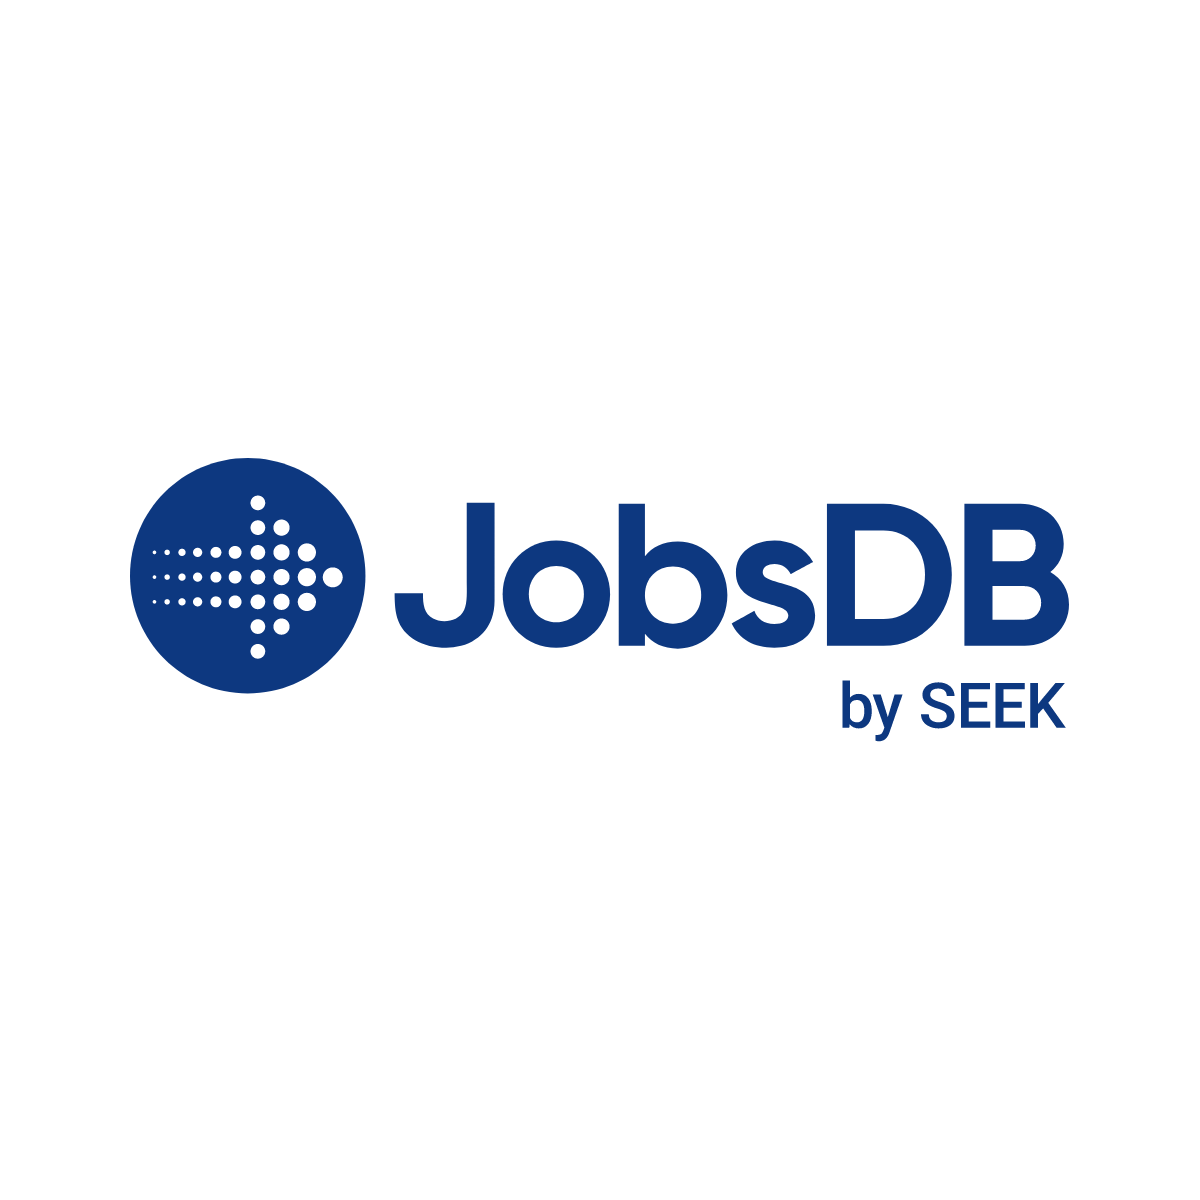

In [11]:
from IPython.display import Image
Image("C:/Users/tanaw/Downloads/banner-ac16df6d9822896298e5bdde8b8fcfde.png", width=200, height=200)

In [12]:
import requests 
import bs4
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt 
from datetime import datetime

In [2]:
role_list = []
firm_list = []
location_list = []
jd_list = []
time_ago_list = []

page = 1 

while page <= 100:
    data = requests.get('https://th.jobsdb.com/th/search-jobs/data-analyst/' + str(page))
    soup = bs4.BeautifulSoup(data.text)

    for job in soup.find_all('div',{'class':'sx2jih0 zcydq876 zcydq866 zcydq896 zcydq886 zcydq8n zcydq856 zcydq8f6 zcydq8eu'}):
        role = job.find('div',{'class':'sx2jih0 l3gun70 l3gun74 l3gun72'})
        if type(role) == type(None):
            role = np.nan
        else : role = role.text

        firm = job.find('span',{'class':'sx2jih0 zcydq84u _18qlyvc0 _18qlyvc1x _18qlyvc1 _18qlyvca'})
        if type(firm) == type(None):
            firm = np.nan
        else : firm = firm.text 

        location = job.find('span',{'class':'sx2jih0 zcydq84u _18qlyvc0 _18qlyvc1x _18qlyvc3 _18qlyvc7'})
        if type(location) == type(None):
            location = np.nan
        else : location = location.text 

        jd = job.find('div',{'class':'sx2jih0 zcydq8am zcydq84u'})
        if type(jd) == type(None):
            jd = np.nan
        else : jd = jd.text 

        time_ago = job.find('time',{'class':'sx2jih0 zcydq84u'})
        if type(time_ago) == type(None):
            time_ago = np.nan
        else : time_ago = time_ago.text 

        role_list.append(role)
        firm_list.append(firm)
        location_list.append(location)
        time_ago_list.append(time_ago)
        jd_list.append(jd)

    print('success add page {}'.format(page))
    page = page + 1

success add page 1
success add page 2
success add page 3
success add page 4
success add page 5
success add page 6
success add page 7
success add page 8
success add page 9
success add page 10
success add page 11
success add page 12
success add page 13
success add page 14
success add page 15
success add page 16
success add page 17
success add page 18
success add page 19
success add page 20
success add page 21
success add page 22
success add page 23
success add page 24
success add page 25
success add page 26
success add page 27
success add page 28
success add page 29
success add page 30
success add page 31
success add page 32
success add page 33
success add page 34
success add page 35
success add page 36
success add page 37
success add page 38
success add page 39
success add page 40
success add page 41
success add page 42
success add page 43
success add page 44
success add page 45
success add page 46
success add page 47
success add page 48
success add page 49
success add page 50
success a

In [3]:
jobdbs = pd.DataFrame({'role':role_list
                  ,'firm':firm_list
                  ,'location':location_list
                  ,'jd':jd_list
                  ,'time_ago':time_ago_list})
jobdbs.head()

,role,firm,location,jd,time_ago
0,People Data Analyst (Immediate Hiring),"aCommerce Co., Ltd.",Wattana,BTS PHROM PHONGHYBRID WFH WFOFree Company Lunc...,15h ago
1,Internet Research Analyst,Dan Murdoch Risk Services (Thailand) Company L...,Sathorn,English language proficiencyAnalytical and res...,20h ago
2,Administration (Data Analyst),Bualuang Securities Public Company Limited,Bangrak,"Expenses report ,office budgets reportUpdate ...",3d ago
3,Supply Chain Master Data & Analytics Functiona...,"Mars Petcare (Thailand) Co., Ltd.",Jatuchak,Skilled of Supply Chain Master Data & Analytic...,20h ago
4,Pricing Analyst for downstream oil and gas bus...,Vinarco Services (Thailand) Limited,Bangkok,"5 years' in pricing, financial analysis in FMC...",20h ago


In [33]:
def clean_location(location): 
    if location == 'กรุงเทพมหานคร':
        return 'Bangkok'
    elif location == 'สาทร':
        return 'Sathorn'
    elif location == 'ปทุมวัน':
        return 'Pathumwan'
    elif location == 'บางรัก':
        return 'Bangrak'
    elif location == 'จตุจักร':
        return 'Jatuchak'
    elif location == 'ห้วยขวาง':
        return 'Huaykwang'
    elif location == 'คลองเตย':
        return 'Klongtoey'
    elif location == 'วัฒนา':
        return 'Wattana'   
    else : return location

jobdbs['location'] = jobdbs['location'].apply(clean_location)

Location

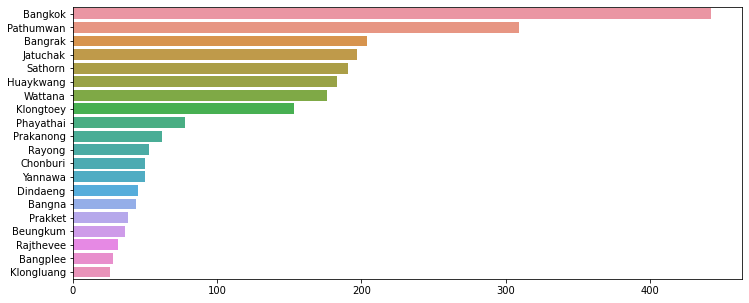

In [34]:
plt.figure(figsize=(12,5))
sns.barplot(x=jobdbs['location'].value_counts().head(20).values,y=jobdbs['location'].value_counts().head(20).index)
plt.show()

Firm

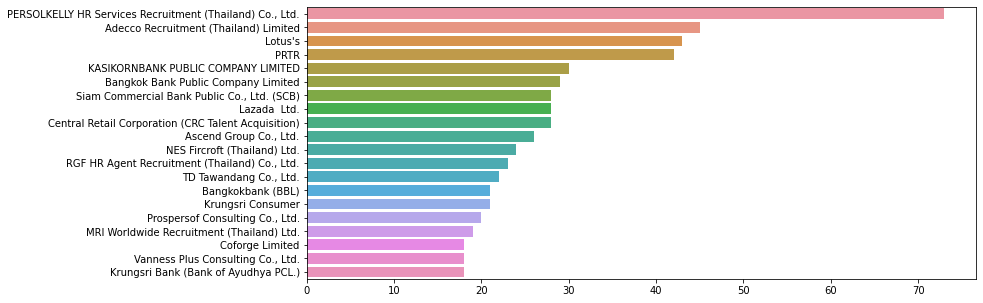

In [22]:
plt.figure(figsize=(12,5))
sns.barplot(x=jobdbs['firm'].value_counts().head(20).values,y=jobdbs['firm'].value_counts().head(20).index)
plt.show()

----

In [45]:
jobdbs.to_csv('jobdbs_DataAnalyst_'+str(datetime.now().date())+'.csv')